## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

За кожне вірно виконане завдання Ви отримуєте **1 бал**.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 
  
  
  

In [1]:
import pandas as pd
from matplotlib import pylab as plt
import numpy as np
import seaborn as sb
import re
dataset = pd.read_csv("titanic.csv")

**Задача 1:** Який відсоток виживання серед чоловіків / жінок? 

In [2]:
sur_men = dataset[dataset['Sex']=='male']
sur_wom = dataset[dataset['Sex']=='female']
print(f"Виживаність серед чоловіків: {(sur_men['Survived'].mean() * 100):.2f}%")
print(f"Виживаність серед жінок: {(sur_wom['Survived'].mean() * 100):.2f}%")

Виживаність серед чоловіків: 18.89%
Виживаність серед жінок: 74.20%


**Задача 2:** Відтворіть ці графіки  
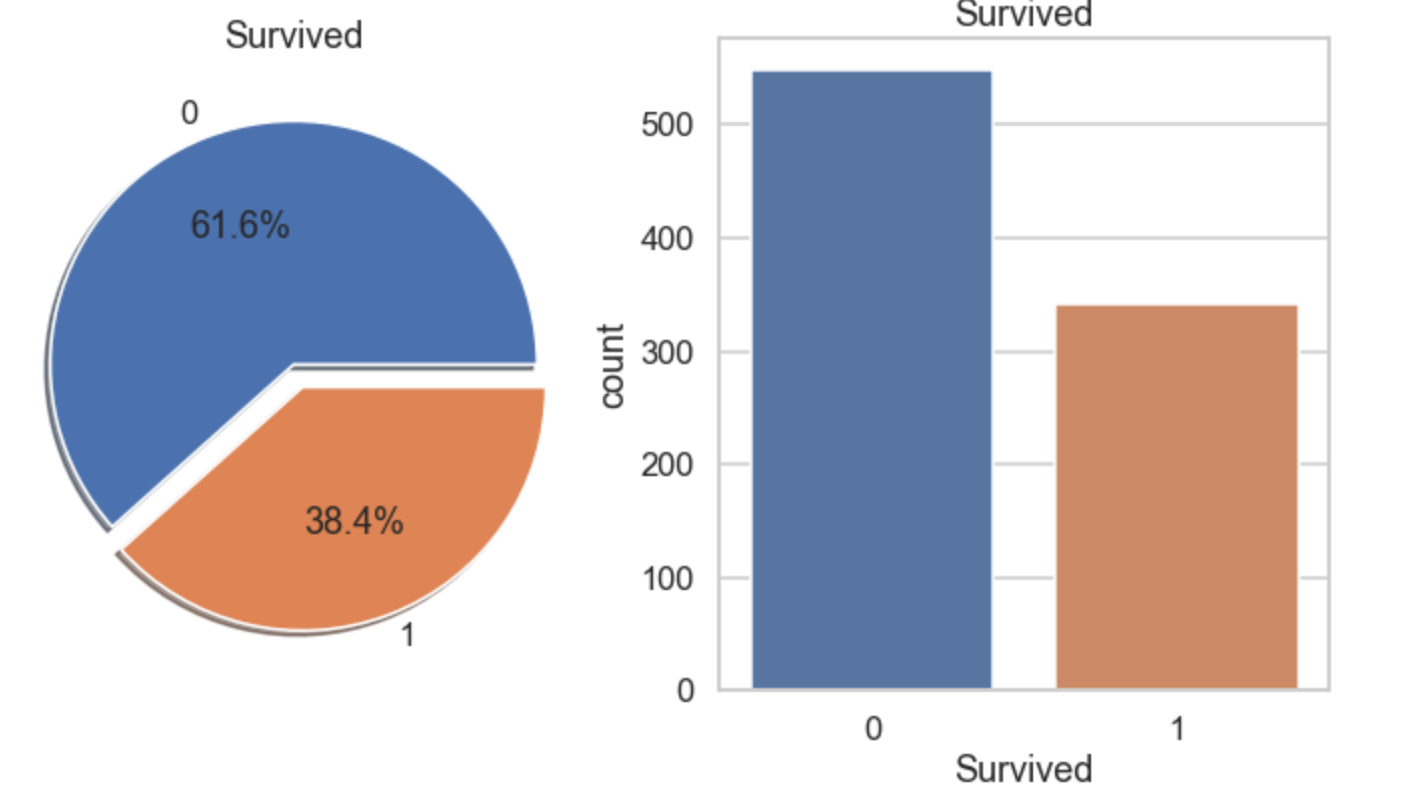


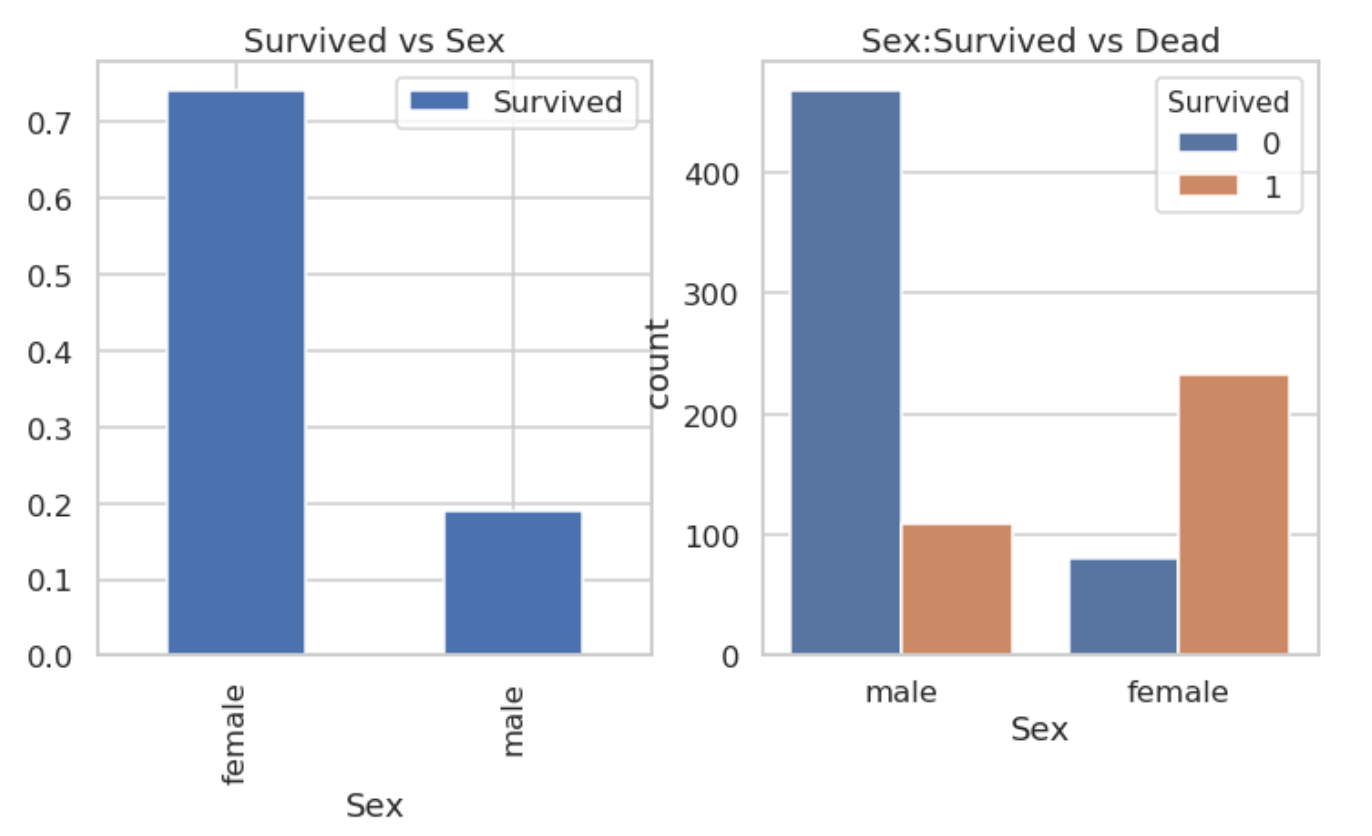

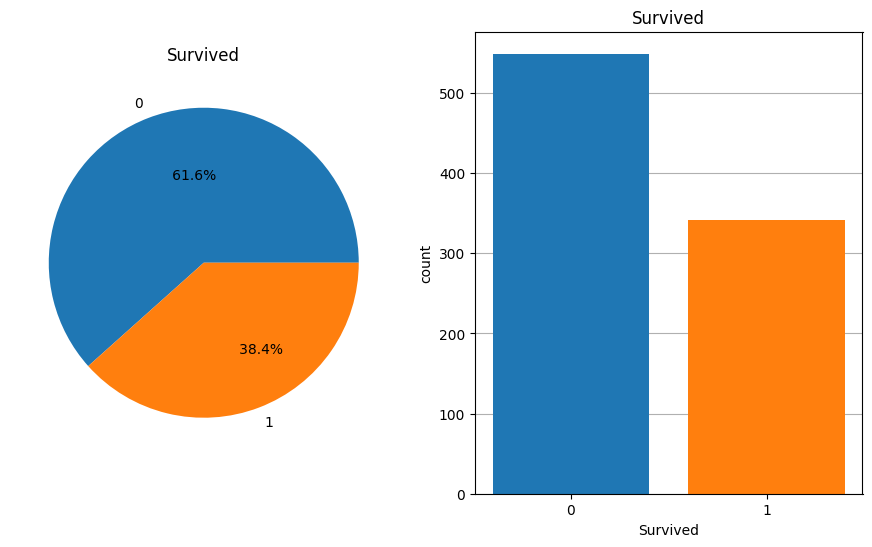

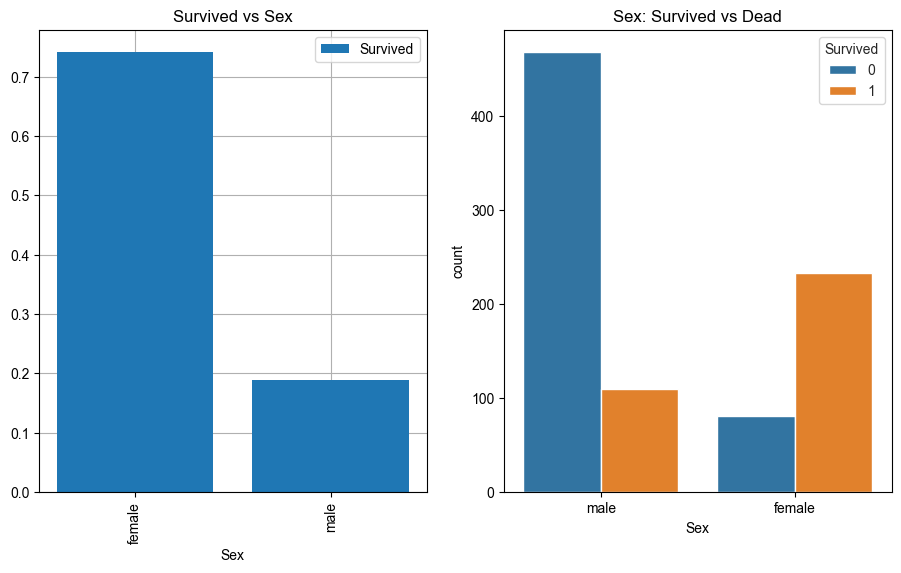

In [3]:
fig = plt.figure(figsize=(11, 6))

ax = fig.add_subplot(1, 2, 1)
sur = dataset['Survived'].sum()
not_sur = len(dataset) - sur
labels = ['0', '1']
sizes = [not_sur, sur]
ax.pie(sizes, labels=labels, autopct='%15.1f%%')
ax.set_title('Survived')

ax1 = fig.add_subplot(1, 2, 2)
ax1.bar(labels, sizes, color=['#1F77B4', '#FF7F0E'])
ax1.set_xlabel("Survived")
ax1.set_ylabel("count")
ax1.set_title("Survived")
ax1.set_axisbelow(True)
ax1.grid(axis='y')

plt.show()



fig = plt.figure(figsize=(11, 6))

ax = fig.add_subplot(1, 2, 1)
male = dataset[dataset['Sex']=='male']
female = dataset[dataset['Sex']=='female']
sur_men = male['Survived'].mean()
sur_wom = female['Survived'].mean()
ax.bar(['female', 'male'], [sur_wom, sur_men], label='Survived')
ax.set_xlabel('Sex')
ax.set_title('Survived vs Sex')
ax.set_xticks([0, 1])
ax.set_xticklabels(['female', 'male'], rotation=90)
ax.set_axisbelow(True)
ax.grid()
ax.legend()

ax1 = fig.add_subplot(1, 2, 2)
sb.set_style('whitegrid')
sur = dataset[['Sex', 'Survived']]
sur_count = sur.value_counts().reset_index(name='count')
sb.barplot(data=sur_count, x='Sex', y='count', hue='Survived', ax=ax1)
ax1.set_title('Sex: Survived vs Dead')

plt.show()

**Прокоментуйте побудовані графіки**:


1.  На першому графіку показано співвідношення тих хто вижив і тих хто загинув у відсотках 
2.  На другому графіку показано співвідношення тих хто вижив і тих хто загинув в числах
3.  На третьому графіку показано співвідношення тих хто вижив з жінок і чоловіків
4.  На четвертому графіку показано співвідношення тих хто вижив і тих хто загинув з жінок і чоловіків



**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних? 

In [4]:
print(dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі. 

In [5]:
from typing import Counter

mas_name = []

name_wom = dataset.loc[dataset["Sex"] == "female", "Name"]
for line in name_wom:
    match = re.search(r"(\(.+\))", line)
    if match:
        name = re.search(r"(\([A-Z][a-z]+\))", line)
        if name:
            mas_name.append(name.group(1)[1:])
    else:
        name = re.search(r"(\.\s[A-Z][a-z]+)", line)
        if name:
            mas_name.append(name.group(1)[2:])

name_counts = Counter(mas_name)

pop_name_wom = name_counts.most_common(3)
print(pop_name_wom)

[('Anna', 9), ('Mary', 9), ('Margaret', 6)]


**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі. 

In [6]:
mas_name = []

name_wom = dataset.loc[dataset["Sex"] == "male", "Name"]
for line in name_wom:
    match = re.search(r"(\(.+\))", line)
    if match:
        name = re.search(r"(\([A-Z][a-z]+\))", line)
        if name:
            mas_name.append(name.group(1)[1:])
    else:
        name = re.search(r"(\.\s[A-Z][a-z]+)", line)
        if name:
            mas_name.append(name.group(1)[2:])

name_counts = Counter(mas_name)

pop_name_wom = name_counts.most_common(3)
print(pop_name_wom)

[('William', 35), ('John', 23), ('George', 13)]


**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
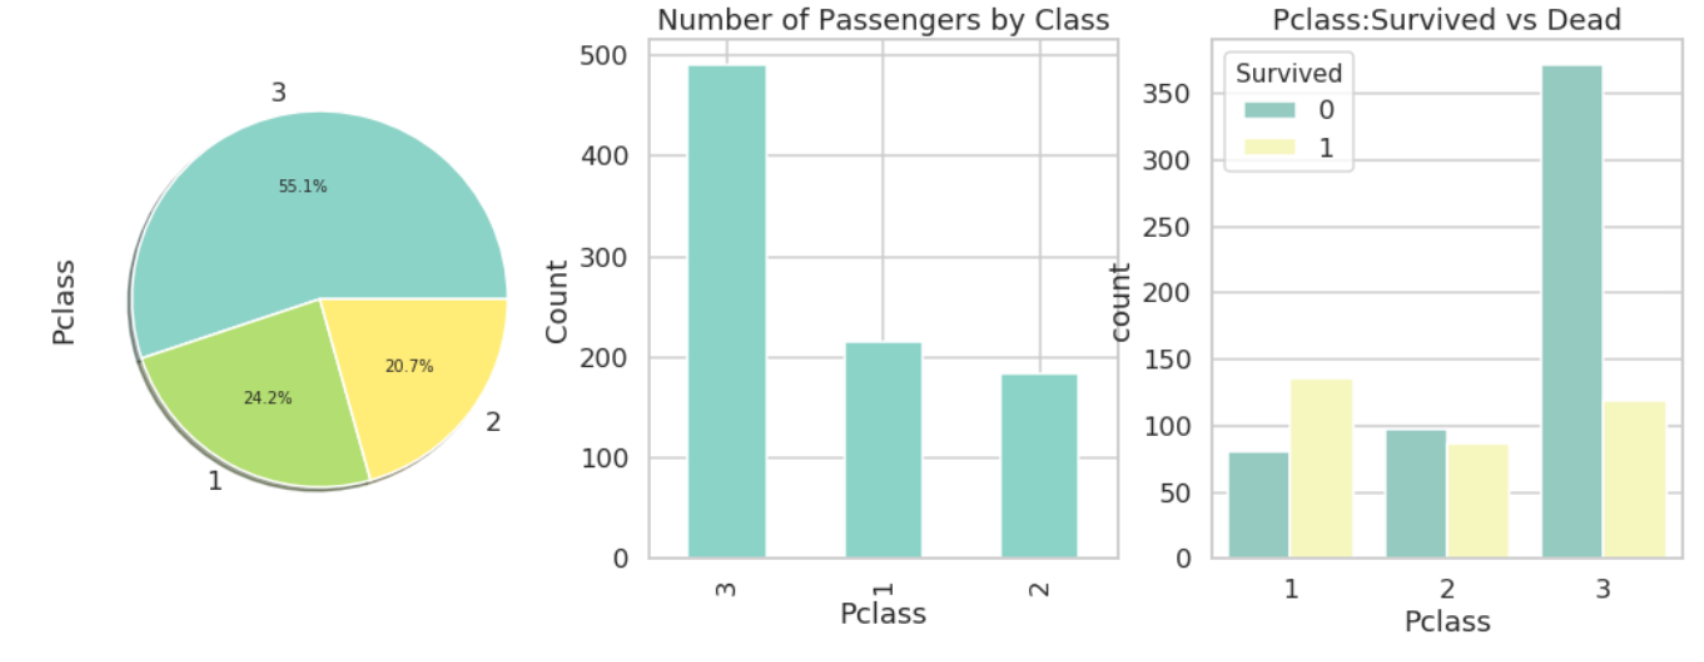

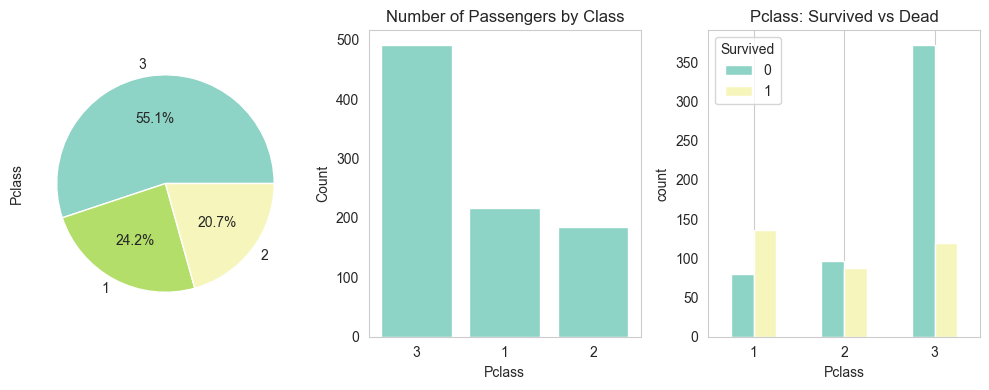

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))

pc = dataset['Pclass'].value_counts()
labels_pc = ['3', '1', '2']
ax1.pie(pc, labels=labels_pc, autopct='%1.1f%%', colors=['#8DD3C6', '#B3DE69', '#F6F6BC'])
ax1.set_ylabel('Pclass')

ax2.bar(labels_pc, pc, color=['#8DD3C6'])
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Count')
ax2.set_title('Number of Passengers by Class')
ax2.set_axisbelow(True)
ax2.grid()
ax2.set_xticks(labels_pc)

psur = dataset.groupby(['Pclass', 'Survived']).size().unstack()
psur.plot(kind='bar', ax=ax3, color=['#8DD3C6', '#F6F6BC'])
ax3.set_title('Pclass: Survived vs Dead')
ax3.set_xlabel('Pclass')
ax3.set_ylabel('count')
ax3.legend(title='Survived')
ax3.set_axisbelow(True)
ax3.grid(axis='y')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Прокоментуйте побудовані графіки**:


1.  На першому графіку показано співвідношення покупки квитків в різних класах у процентах
2.  На другому графіку показано співвідношення покупки квитків в різних класах в числах
3.  На третьому графіку показано співвідношення тих хто вижив і тих хто загинув з людей в залежності від класу купленого квитка людиною

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
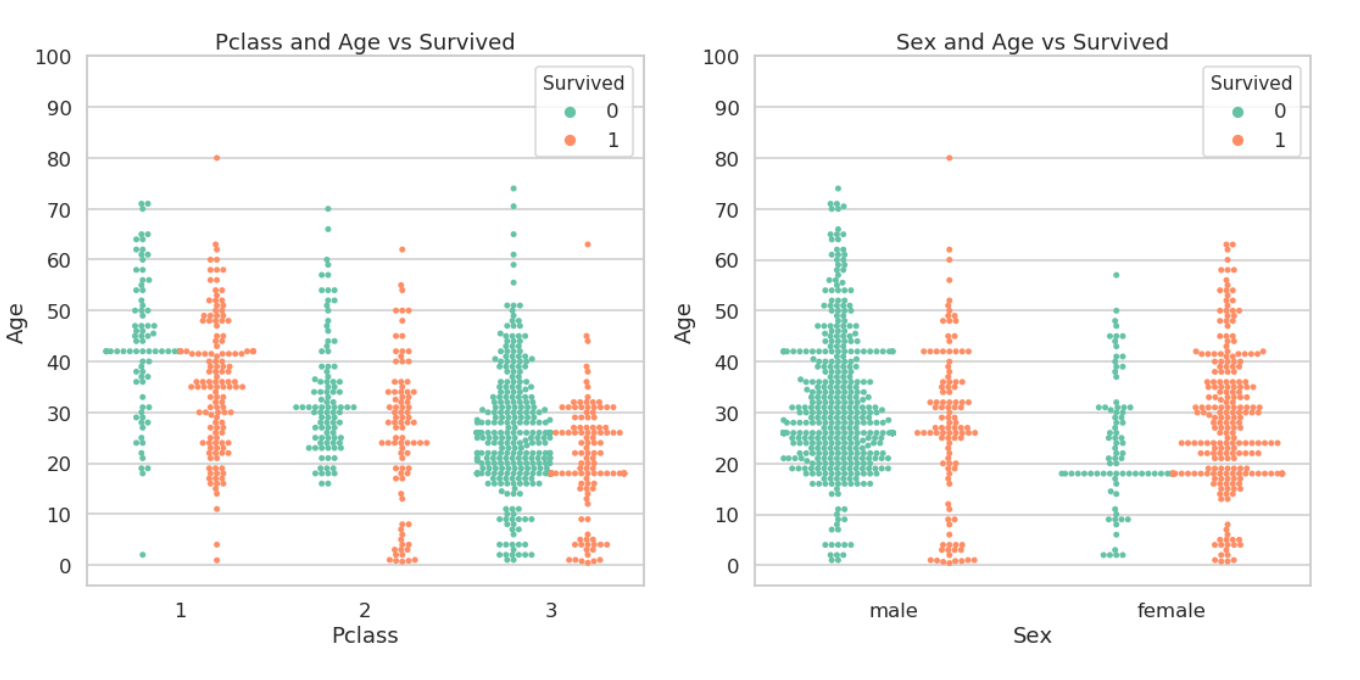![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

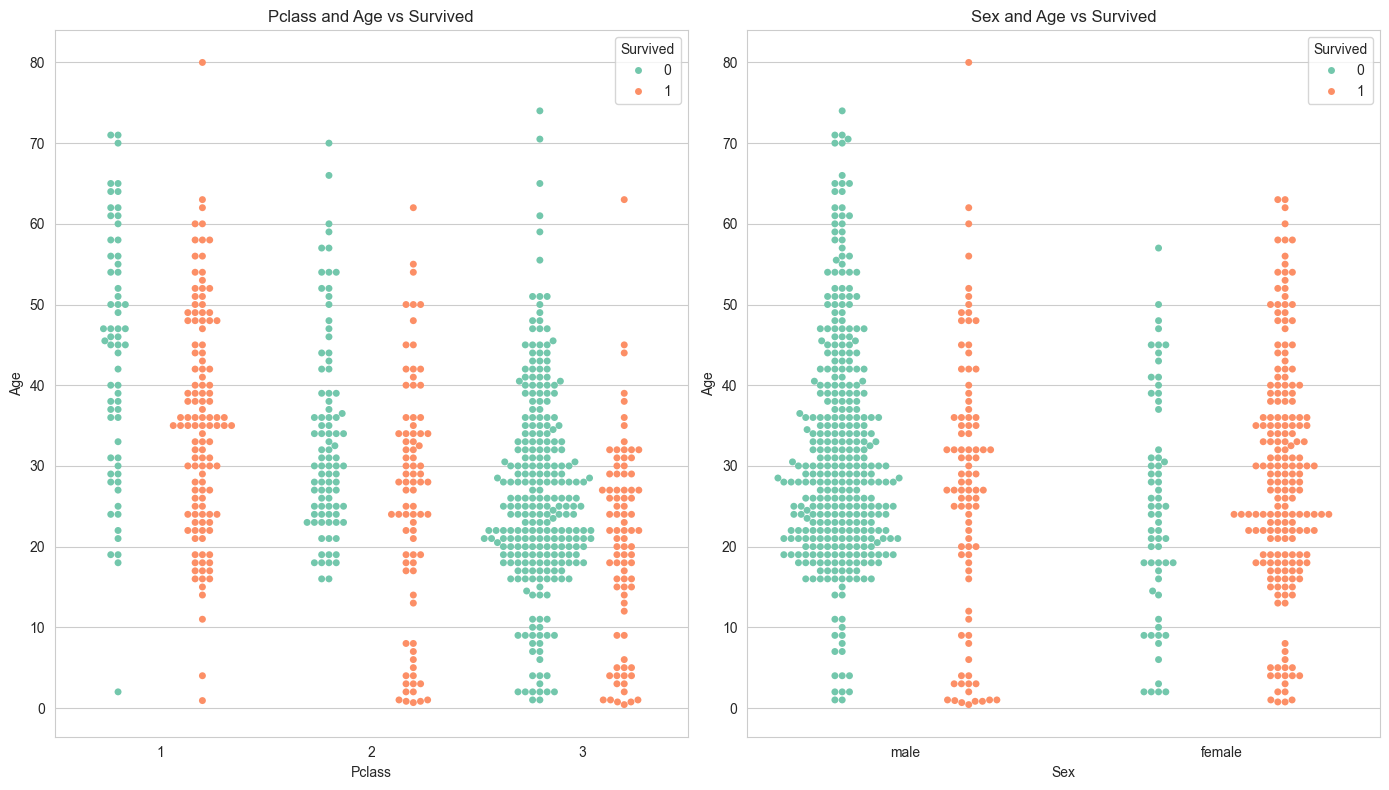

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

sb.swarmplot(x='Pclass', y='Age', hue='Survived', data=dataset, dodge=True, ax=ax1, palette=['#73C7AC', '#FC8F66'])
ax1.set_title('Pclass and Age vs Survived')
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Age')

sb.swarmplot(x='Sex', y='Age', hue='Survived', data=dataset, dodge=True, ax=ax2, palette=['#73C7AC', '#FC8F66'])
ax2.set_title('Sex and Age vs Survived')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Age')

plt.tight_layout()
plt.show()

**Прокоментуйте побудовані графіки**:


1.  На першому графіку показано співвідношення тих хто вижив і тих хто загинув з людей в залежності від віку і купленого квитка
2.  На другому графіку показано співвідношення тих хто вижив і тих хто загинув з людей в залежності від віку і статі

**Задача 8** Побудуйте наступні діаграми розподілів:  

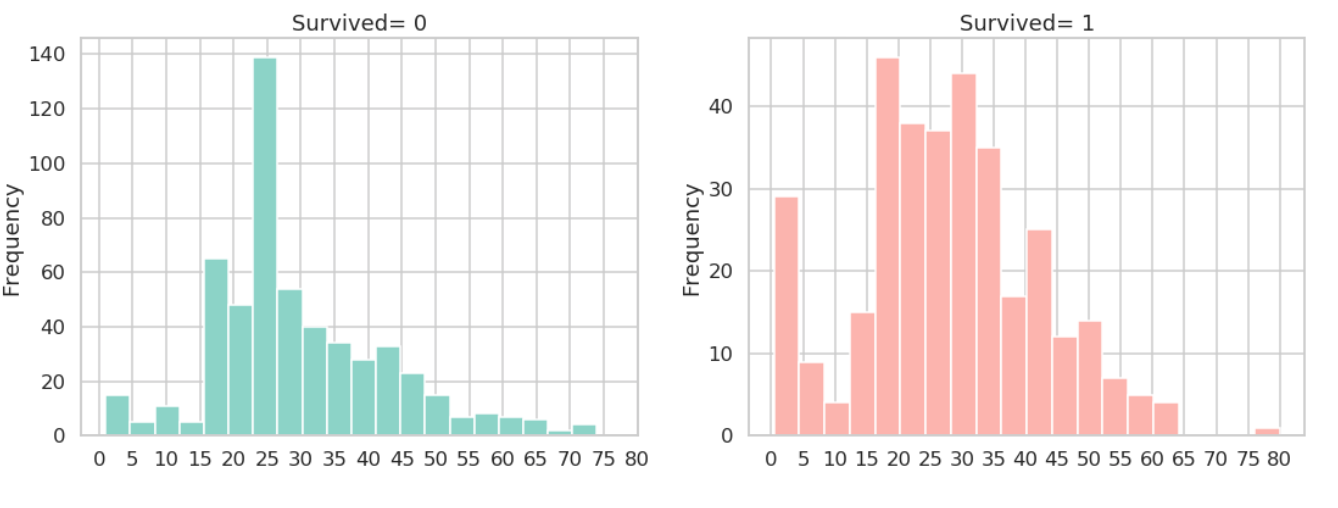



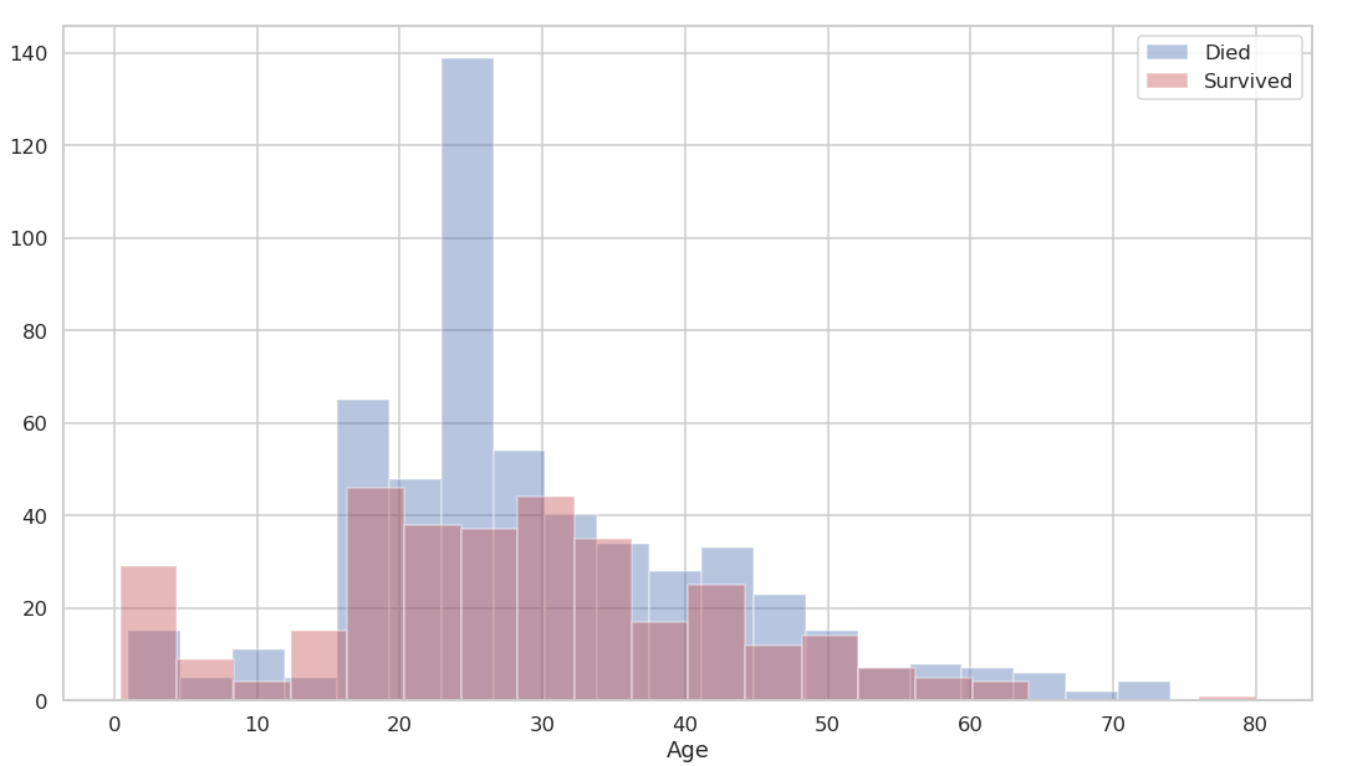

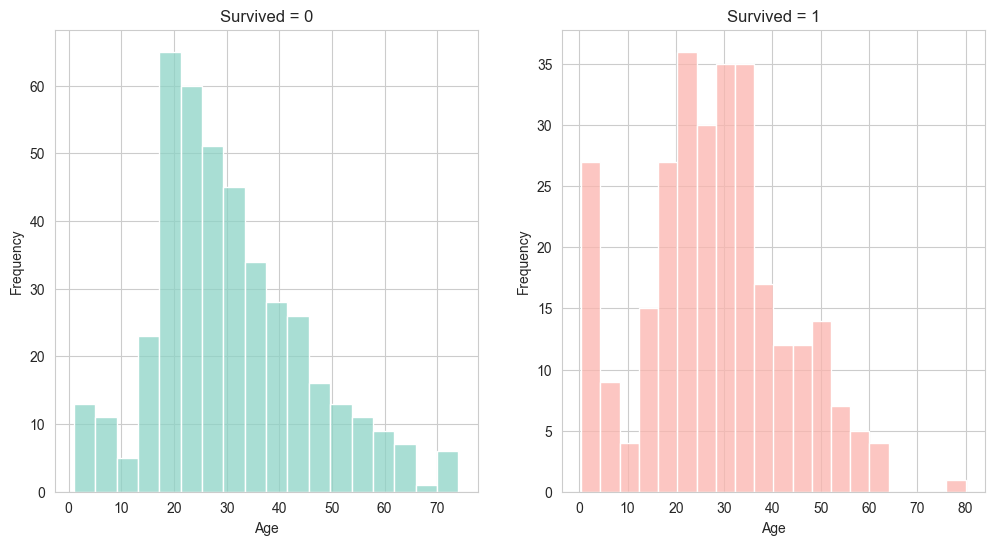

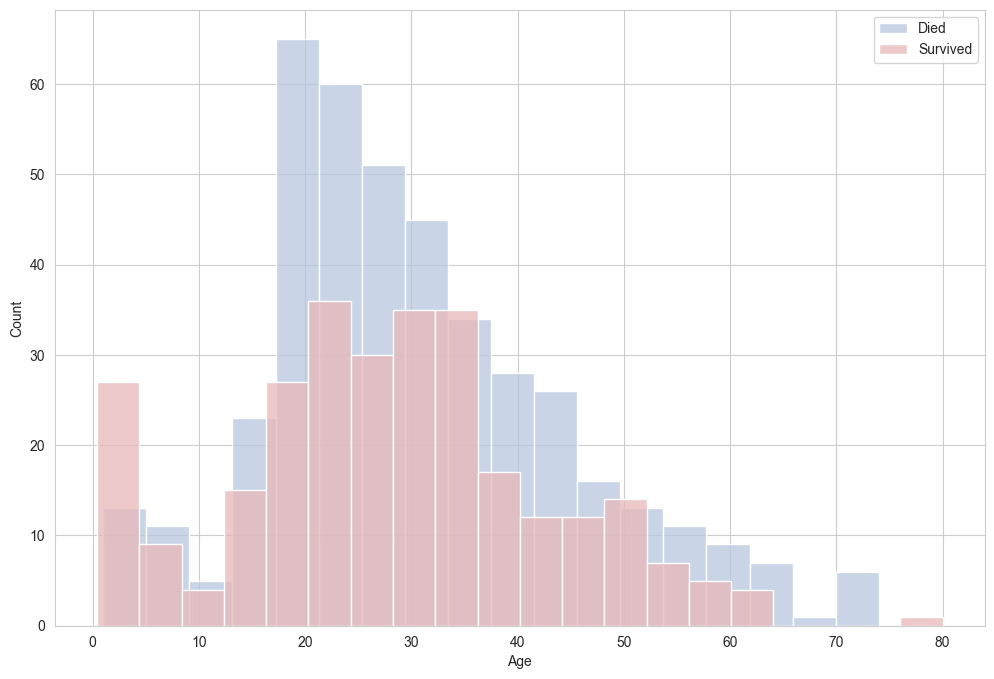

In [9]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_ylabel('Frequency')
sur_age = dataset.loc[dataset['Survived'] == 1, ['Age']]
dead_age = dataset.loc[dataset['Survived'] == 0, ['Age']]
sb.histplot(data=dead_age, x='Age', ax=ax1, binwidth=4, color='#8DD3C6')
ax1.set_title('Survived = 0')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_ylabel('Frequency')
sb.histplot(data=sur_age, x='Age', ax=ax2, binwidth=4, color='#FBB4AE')
ax2.set_title('Survived = 1')

plt.show()




fig = plt.figure(figsize=(12, 8))

sb.histplot(data=dead_age, x='Age', binwidth=4, label='Died', color='#B7C6DF')

sb.histplot(data=sur_age, x='Age', binwidth=4, label='Survived', color='#E7B8B9')

plt.legend()
plt.show()

**Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?**



1.  Побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок достатньо



**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
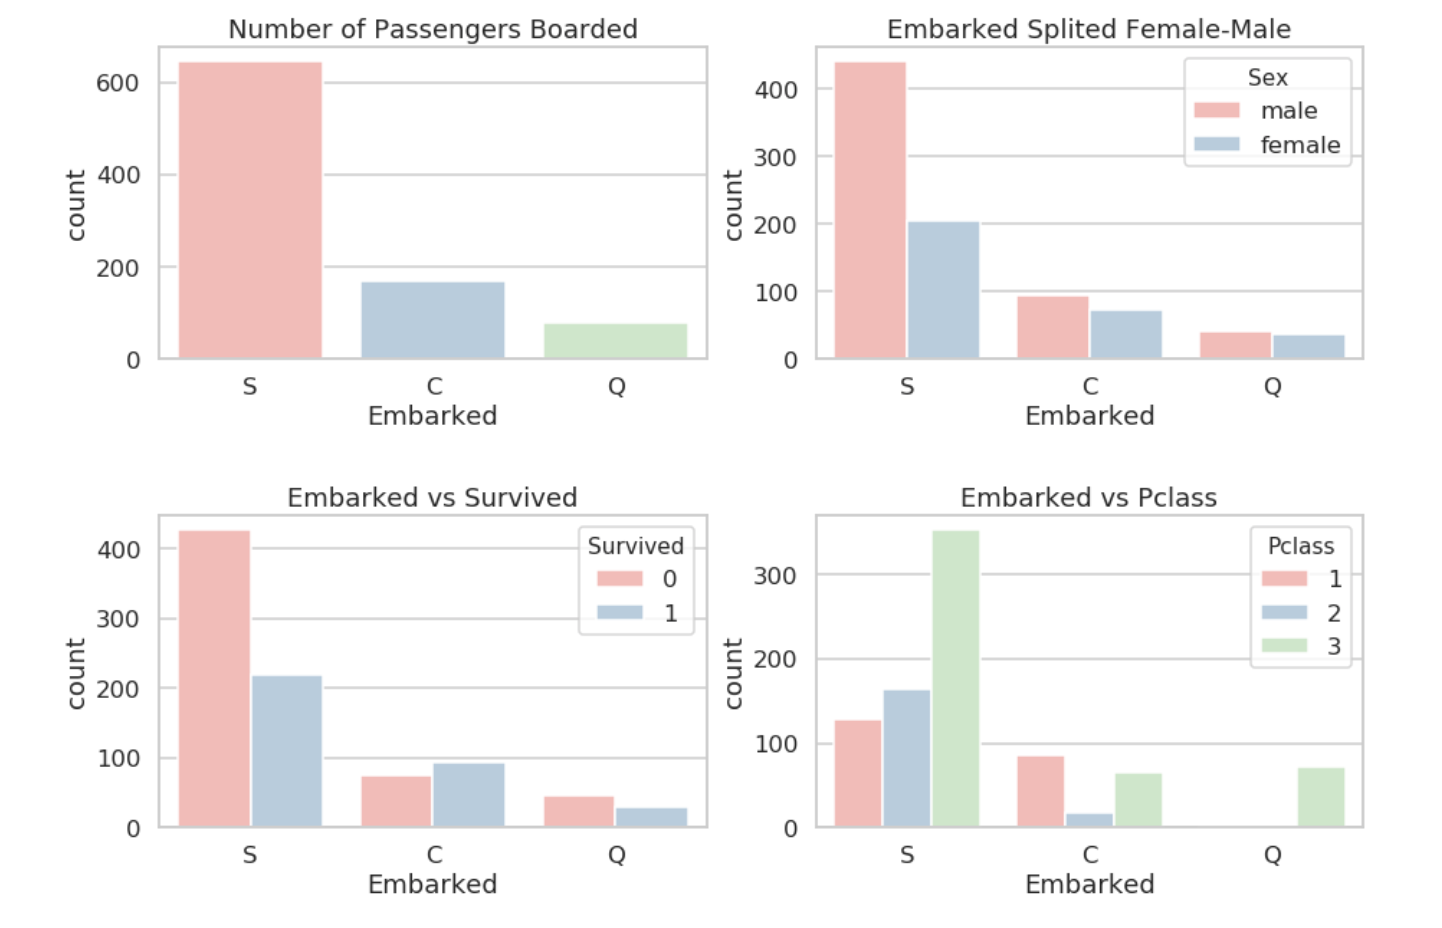

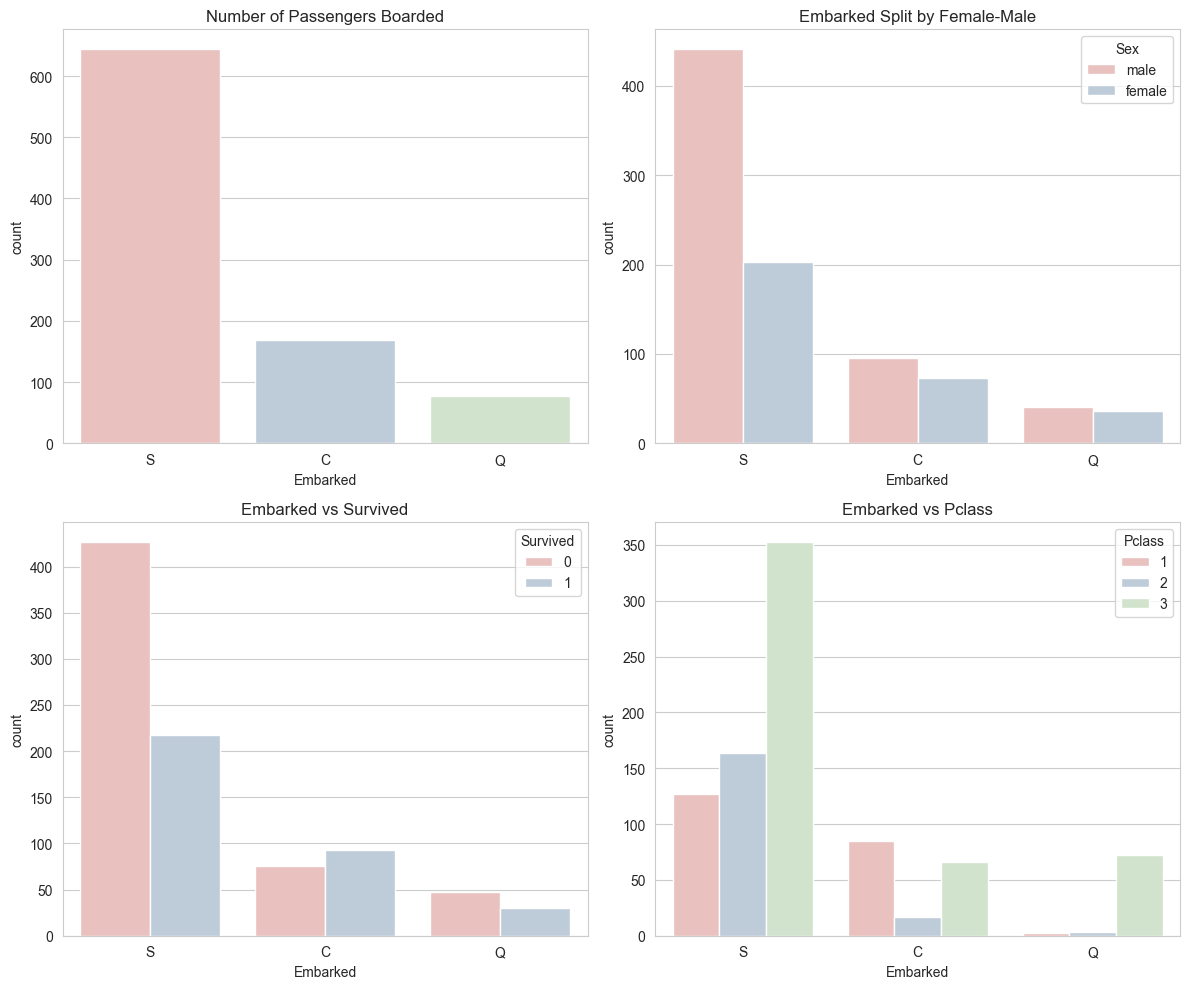

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
sb.set_style('whitegrid')

emb = dataset[['Embarked']]
emb_count = emb.value_counts().reset_index(name='count')
colors_embarked = ['#F0BCB8', '#B9CCDD', '#CFE6CA']
sb.barplot(data=emb_count, x='Embarked', y='count', ax=ax1, hue='Embarked', palette=colors_embarked)
ax1.set_title('Number of Passengers Boarded')

emb_sex = dataset[['Embarked', 'Sex']]
emb_sex_count = emb_sex.value_counts().reset_index(name='count')
colors_sex = ['#F0BCB8', '#B9CCDD']
sb.barplot(data=emb_sex_count, x='Embarked', y='count', ax=ax2, hue='Sex', palette=colors_sex)
ax2.set_title('Embarked Split by Female-Male')

emb_sur = dataset[['Embarked', 'Survived']]
emb_sur_count = emb_sur.value_counts().reset_index(name='count')
colors_survived = ['#F0BCB8', '#B9CCDD']
sb.barplot(data=emb_sur_count, x='Embarked', y='count', ax=ax3, hue='Survived', palette=colors_survived)
ax3.set_title('Embarked vs Survived')

emb_pc = dataset[['Embarked', 'Pclass']]
emb_pc_count = emb_pc.value_counts().reset_index(name='count')
colors_pclass = ['#F0BCB8', '#B9CCDD', '#CFE6CA']
sb.barplot(data=emb_pc_count, x='Embarked', y='count', ax=ax4, hue='Pclass', palette=colors_pclass)
ax4.set_title('Embarked vs Pclass')

plt.tight_layout()
plt.show()

**Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

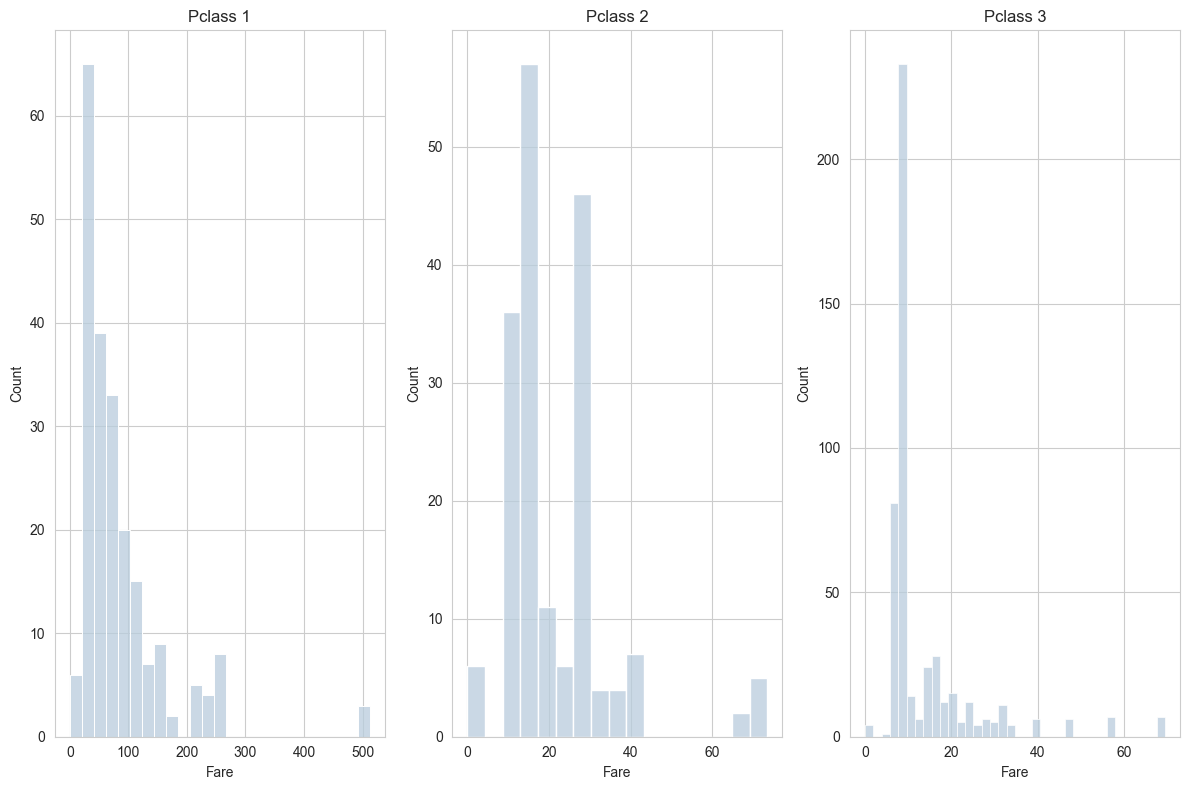

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))
sb.set_style('whitegrid')

colors = ['#B9CCDD']

fare_pclass1 = dataset.loc[dataset['Pclass'] == 1, ['Fare']]
sb.histplot(data=fare_pclass1, x='Fare', ax=ax1, color=colors[0])
ax1.set_title('Pclass 1')

fare_pclass2 = dataset.loc[dataset['Pclass'] == 2, ['Fare']]
sb.histplot(data=fare_pclass2, x='Fare', ax=ax2, color=colors[0])
ax2.set_title('Pclass 2')

fare_pclass3 = dataset.loc[dataset['Pclass'] == 3, ['Fare']]
sb.histplot(data=fare_pclass3, x='Fare', ax=ax3, color=colors[0])
ax3.set_title('Pclass 3')

plt.tight_layout()
plt.show()

**Прокоментуйте побудовані графіки**:


1.  На графіках показано ціну квитка враховуючи клас людини який купив цей квиток